In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
import sys
sys.path.append(r"/Users/binxuwang/Github/Neuro-ActMax-GAN-comparison")
import pandas as pd
from os.path import join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core.utils.plot_utils import saveallforms
from neuro_data_analysis.neural_data_lib import load_neural_data, load_img_resp_pairs, load_latent_codes
from neuro_data_analysis.neural_data_lib import load_neural_data, extract_all_evol_trajectory_psth, extract_evol_activation_array, pad_psth_traj, get_expstr
from neuro_data_analysis.neural_data_utils import get_all_masks

In [3]:
BFEStats_merge, BFEStats = load_neural_data()

In [6]:
BFEStats[155]

{'Animal': None,
 'color_seq': array([[0.61960784, 0.00392157, 0.25882353],
        [0.70154783, 0.12543063, 0.30598303],
        [0.77363751, 0.19011375, 0.31947436],
        [0.83529412, 0.24313725, 0.30980392],
        [0.88614196, 0.29619326, 0.2885084 ],
        [0.92648806, 0.3560845 , 0.26796344],
        [0.95686275, 0.42745098, 0.2627451 ],
        [0.97733146, 0.51125087, 0.28571282],
        [0.98845029, 0.59902321, 0.32974079],
        [0.99215686, 0.68235294, 0.38039216],
        [0.99232692, 0.75564058, 0.42702848],
        [0.99270564, 0.82011746, 0.47768365],
        [0.99607843, 0.87843137, 0.54509804],
        [1.        , 0.93163941, 0.63337463],
        [1.        , 0.97459058, 0.71361567],
        [1.        , 1.        , 0.74901961],
        [0.9828335 , 1.        , 0.7165381 ],
        [0.95064015, 0.98735456, 0.64943686],
        [0.90196078, 0.96078431, 0.59607843],
        [0.83746794, 0.92927946, 0.59202295],
        [0.75935096, 0.89684346, 0.61808563],
    

In [7]:
Expi = 155
S = BFEStats[Expi - 1].copy()

In [ ]:
tabdir = r"E:\OneDrive - Harvard University\Manuscript_BigGAN\Stats_tables"
tabdir = r'/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_BigGAN/Stats_tables'
meta_act_df = pd.read_csv(join(tabdir, "meta_activation_stats.csv"))
BFEStats_merge, BFEStats = load_neural_data()
psth_col, meta_df = extract_all_evol_trajectory_psth(BFEStats)
psth_extrap_arr, extrap_mask_arr, max_len = pad_psth_traj(psth_col)
Amsk, Bmsk, V1msk, V4msk, ITmsk, \
    length_msk, spc_msk, sucsmsk, \
    bsl_unstable_msk, bsl_stable_msk, validmsk = get_all_masks(meta_act_df)

Exp 003 Beto-22072020-002 Pref chan5 U2
image size [3. 3.] deg  pos [-0.7  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 004 Beto-22072020-003 Pref chan5 U2
image size [6. 6.] deg  pos [-0.7  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN_class
Exp 005 Beto-23072020-002 Pref chan29 U2
image size [3. 3.] deg  pos [-0.8  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 006 Beto-27072020-002 Pref chan26 U1
image size [3. 3.] deg  pos [-1.1  0. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 007 Beto-28072020-003 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN
Exp 008 Beto-28072020-006 Pref chan15 U1
image size [3. 3.] deg  pos [-0.5  1. ]
Evol thr0: BigGAN_class   thr1: BigGAN
Exp 009 Beto-29072020-002 Pref chan28 U1
image size [3. 3.] deg  pos [0.  0.5]
Evol thr0: fc6   thr1: BigGAN_class
Exp 010 Beto-29072020-003 Pref chan18 U1
image size [4. 4.] deg  pos [-0.5  1. ]
Evol thr0: fc6   thr1: BigGAN_class
Exp 012 Beto-31072020-003 Pref chan29 U2
image size [3. 3.] de

In [20]:
Expi = 155
expstr = get_expstr(BFEStats, Expi)
print(expstr)

Exp 155 Alfa-25112020-003 Pref chan12 U1
image size [3. 3.] deg  pos [ 0.  -0.8]
Evol thr0: fc6   thr1: BigGAN_class


In [24]:
psth_col[Expi].shape

(23, 4, 200)

### Figure 2D

In [31]:
import pickle
import json


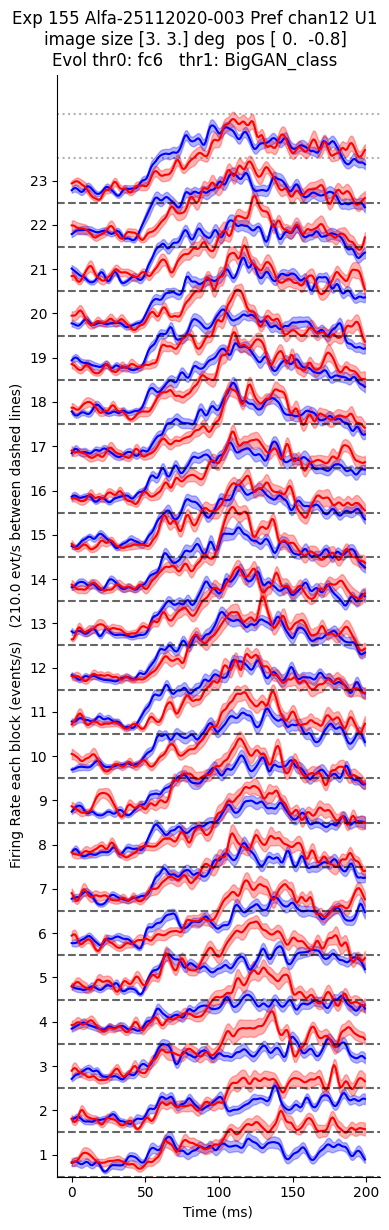

Saved Figure2 source data for Expi 155 to Figure2D_src_psth_Exp155.pkl


In [32]:
def _shaded_errorbar(x, y, yerr, label=None, color=None, **kwargs):
    plt.fill_between(x, y-yerr, y+yerr, alpha=0.3, label=None, color=color)
    plt.plot(x, y, color=color, label=label, **kwargs)

def stack_psth_plot(psth_arr, offset=200, titlestr=""):
    """Plot a sequence of PSTHs stacked vertically with offset"""
    blockN = psth_arr.shape[0]
    fig = plt.figure(figsize=[4, 0.5 * blockN + 1])
    for block in range(blockN):
        _shaded_errorbar(np.arange(200), offset * block + psth_arr[block, 0, :], psth_col[Expi][block, 2, :],
                         color="blue")
        _shaded_errorbar(np.arange(200), offset * block + psth_arr[block, 1, :], psth_col[Expi][block, 3, :],
                         color="red")
        plt.axhline(offset * block, color="black", alpha=0.6, linestyle="--")
    plt.axhline(offset * blockN, color="black", alpha=0.3, linestyle=":", )
    plt.axhline(offset * (blockN + 1), color="black", alpha=0.3, linestyle=":", )
    plt.yticks(np.arange(0, offset * blockN, offset) + offset / 2, 1 + np.arange(0, blockN))
    plt.ylim(0, offset * blockN + np.max(psth_arr[-1, :2, :]))
    plt.xlabel("Time (ms)")
    plt.ylabel(f"Firing Rate each block (events/s)   ({offset} evt/s between dashed lines)")
    if titlestr != "":
        fig.suptitle(titlestr)
    plt.tight_layout()
    plt.show()
    return fig


offset = psth_col[Expi][:, 0:2].max() / 2.2
# round off to 10
offset = np.ceil(offset / 10) * 10
figh3 = stack_psth_plot(psth_col[Expi], offset=offset, titlestr=expstr)

fig2_src_data = {
    "Expi": Expi,
    "expstr": expstr,
    "psth_arr": psth_col[Expi], # shape (blockN, 4, 200)
    "offset": offset,
}
source_data_root = r"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_BigGAN/Submissions/Manuscript_BigGAN - NatNeuro/2025-10-Accepted-In-Principle-Docs/SourceData/"
source_data_dir = join(source_data_root, "Fig2_Source_data")
with open(join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}.pkl"), "wb") as f:
    pickle.dump(fig2_src_data, f)

for slice_i, slice_label in enumerate(["DeePSim_mean", "DeePSim_sem", "BigGAN_mean", "BigGAN_sem"]):
    slice_data = psth_col[Expi][:, slice_i, :]
    slice_data_df = pd.DataFrame(slice_data) # shape (blockN, 200)
    slice_data_df.to_csv(join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_{slice_label}.csv"), index=False)


# Prepare a simple dict with Expi, offset, expstr for JSON export
fig2_src_meta = {
    "Expi": int(Expi),
    "offset": float(offset),  # ensure it's serializable
    "expstr": str(expstr)
}
with open(join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_meta.txt"), "w") as f:
    json.dump(fig2_src_meta, f, indent=2)

# dump the psth_col[155] as a few csv files
print(f"Saved Figure2 source data for Expi {Expi} to Figure2D_src_psth_Exp{Expi}.pkl")

In [13]:
psth_col[155].shape

(23, 4, 200)

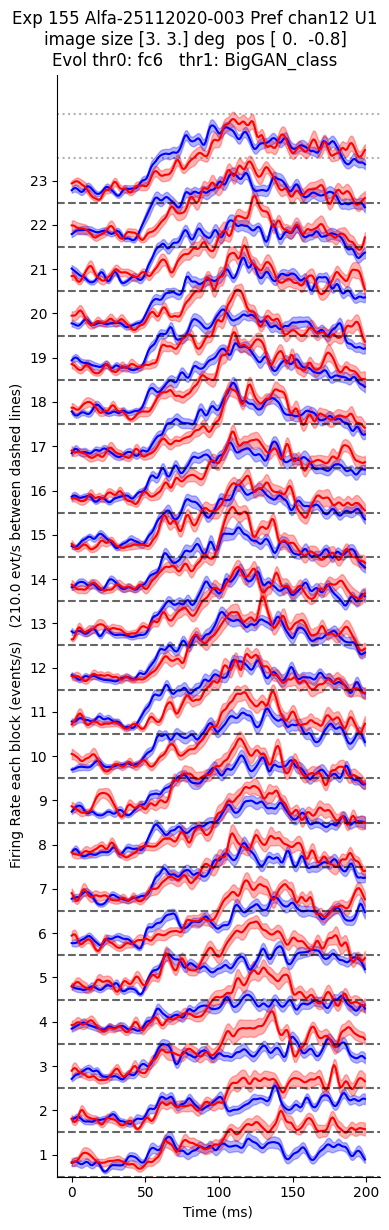

In [ ]:
# Load the Figure2 source data and recreate the figure using stack_psth_plot
import pickle

src_pkl_path = join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}.pkl")
with open(src_pkl_path, "rb") as f:
    fig2_src_data = pickle.load(f)

psth_arr = fig2_src_data["psth_arr"]
offset = fig2_src_data["offset"]
expstr = fig2_src_data["expstr"]

# Use the stack_psth_plot function defined above
fig = stack_psth_plot(psth_arr, offset=offset, titlestr=expstr)

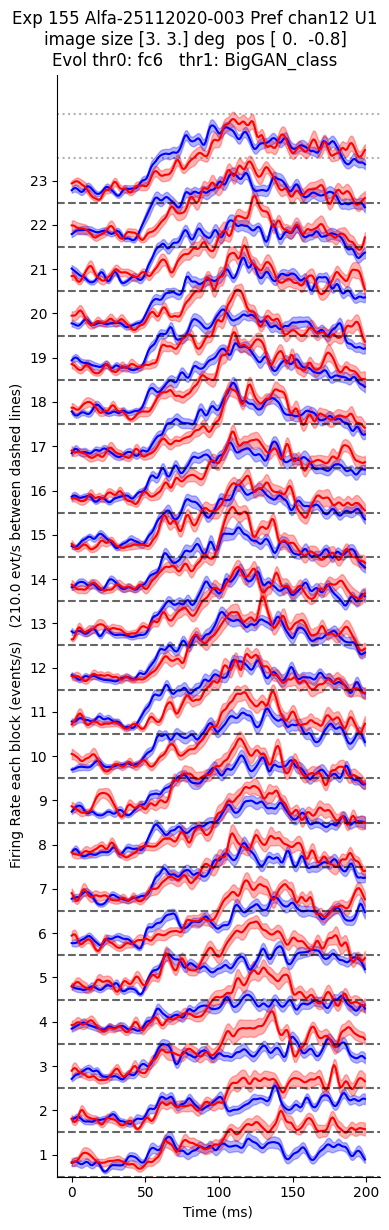

In [33]:
# Load the PSTH data slices from CSV files and reconstruct psth_arr
import pandas as pd
import numpy as np
import os
import json

# The same source_data_dir as above
csv_slices = []
for slice_label in ["DeePSim_mean", "DeePSim_sem", "BigGAN_mean", "BigGAN_sem"]:
    csv_path = os.path.join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_{slice_label}.csv")
    df = pd.read_csv(csv_path)
    # shape (blockN, 200)
    csv_slices.append(df.values)
# Stack into shape (blockN, 4, 200) as in original saved array
psth_arr_from_csv = np.stack(csv_slices, axis=1)  # shape (blockN, 4, 200)

# Load offset and expstr from the JSON (not PKL) for consistency
meta_json_path = os.path.join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_meta.txt")
with open(meta_json_path, "r") as f:
    fig2_src_data_from_json = json.load(f)
offset_from_csv = fig2_src_data_from_json["offset"]
expstr_from_csv = fig2_src_data_from_json["expstr"]

# Use the stack_psth_plot function to recreate the figure
fig_csv = stack_psth_plot(psth_arr_from_csv, offset=offset_from_csv, titlestr=expstr_from_csv)


### Figure 2B


In [54]:
from neuro_data_analysis.neural_data_lib import extract_natref_activation_array

In [55]:
S = BFEStats[155-1]
refresp_arr0, refbsl_arr0, refgen_arr0, refresp_vec0, refbsl_vec0, refgen_vec0 = extract_natref_activation_array(S, 0)
refresp_arr1, refbsl_arr1, refgen_arr1, refresp_vec1, refbsl_vec1, refgen_vec1 = extract_natref_activation_array(S, 1)

In [65]:
refresp_mat0.shape

(23, 10)

In [53]:
list(S["ref"])

['idx_seq', 'psth', 'rspmat']

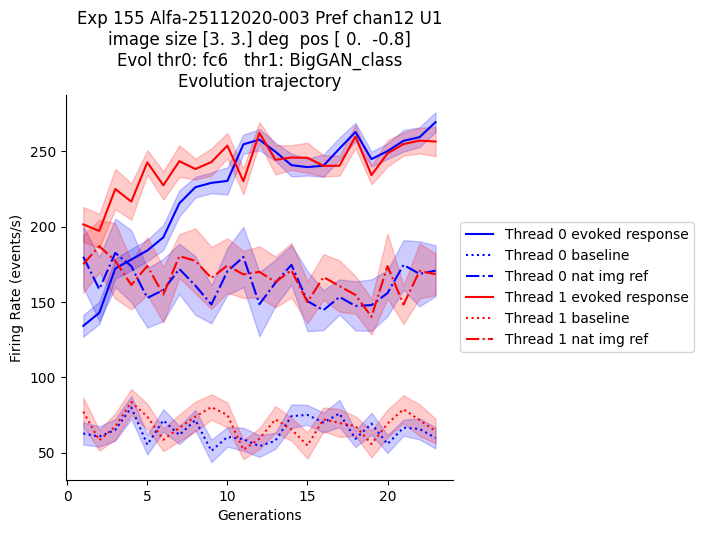

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the arrays into a dataframe
df_resp0 = pd.DataFrame({
    "resp": resp_vec0,
    "bsl": bsl_vec0,
    "gen": gen_vec0
})
df_resp1 = pd.DataFrame({
    "resp": resp_vec1,
    "bsl": bsl_vec1,
    "gen": gen_vec1
})
df_natref_resp0 = pd.DataFrame({
    "resp": refresp_vec0,
    "bsl": refbsl_vec0,
    "gen": refgen_vec0
})
df_natref_resp1 = pd.DataFrame({    
    "resp": refresp_vec1,
    "bsl": refbsl_vec1,
    "gen": refgen_vec1
})

title_str = get_expstr(BFEStats, Expi)
plt.figure(figsize=(5,5))
sns.lineplot(data=df_resp0, x="gen", y="resp", errorbar="se", label="Thread 0 evoked response", color="blue")
sns.lineplot(data=df_resp0, x="gen", y="bsl", errorbar="se", label="Thread 0 baseline", color="blue", linestyle=":")
sns.lineplot(data=df_natref_resp0, x="gen", y="resp", errorbar="se", label="Thread 0 nat img ref", color="blue", linestyle="-.")
sns.lineplot(data=df_resp1, x="gen", y="resp", errorbar="se", label="Thread 1 evoked response", color="red")
sns.lineplot(data=df_resp1, x="gen", y="bsl", errorbar="se", label="Thread 1 baseline", color="red", linestyle=":")
sns.lineplot(data=df_natref_resp1, x="gen", y="resp", errorbar="se", label="Thread 1 nat img ref", color="red", linestyle="-.")
plt.xlabel("Generations")
plt.ylabel("Firing Rate (events/s)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(f"{title_str}\nEvolution trajectory")
# plt.tight_layout()
plt.show()

Saved Figure2 source data for Expi 155 to Figure2B_src_resp_Exp155.pkl


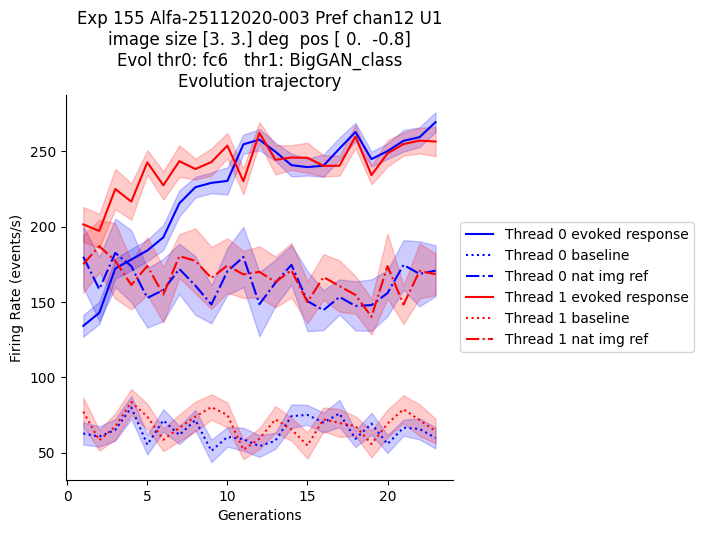

In [75]:

import os
import pickle
# Concatenate the arrays into dataframes
df_resp0 = pd.DataFrame({
    "resp": resp_vec0,
    "bsl": bsl_vec0,
    "gen": gen_vec0
})
df_resp1 = pd.DataFrame({
    "resp": resp_vec1,
    "bsl": bsl_vec1,
    "gen": gen_vec1
})
df_natref_resp0 = pd.DataFrame({
    "resp": refresp_vec0,
    "bsl": refbsl_vec0,
    "gen": refgen_vec0
})
df_natref_resp1 = pd.DataFrame({    
    "resp": refresp_vec1,
    "bsl": refbsl_vec1,
    "gen": refgen_vec1
})

source_data_root = r"/Users/binxuwang/Library/CloudStorage/OneDrive-HarvardUniversity/Manuscript_BigGAN/Submissions/Manuscript_BigGAN - NatNeuro/2025-10-Accepted-In-Principle-Docs/SourceData/"
source_data_dir = join(source_data_root, "Fig2_Source_data")
with open(join(source_data_dir, f"Figure2B_src_resp_Exp{Expi}.pkl"), "wb") as f:
    pickle.dump({
       "thread0_resp_df": df_resp0,
       "thread1_resp_df": df_resp1,
       "thread0_natref_resp_df": df_natref_resp0,
       "thread1_natref_resp_df": df_natref_resp1,
    }, f)
# Save each dataframe as a CSV file in the source data directory
for df, savename in zip([df_resp0, df_resp1, df_natref_resp0, df_natref_resp1], 
                        ["DeePSim_thread_evol", 
                         "BigGAN_thread_evol", 
                         "DeePSim_thread_natref", 
                         "BigGAN_thread_natref"]):
    df.to_csv(join(source_data_dir, f"Figure2B_src_resp_Exp{Expi}_{savename}.csv"), index=False)

print(f"Saved Figure2 source data for Expi {Expi} to Figure2B_src_resp_Exp{Expi}.pkl")

title_str = get_expstr(BFEStats, Expi)
plt.figure(figsize=(5,5))
sns.lineplot(data=df_resp0, x="gen", y="resp", errorbar="se", label="Thread 0 evoked response", color="blue")
sns.lineplot(data=df_resp0, x="gen", y="bsl", errorbar="se", label="Thread 0 baseline", color="blue", linestyle=":")
sns.lineplot(data=df_natref_resp0, x="gen", y="resp", errorbar="se", label="Thread 0 nat img ref", color="blue", linestyle="-.")
sns.lineplot(data=df_resp1, x="gen", y="resp", errorbar="se", label="Thread 1 evoked response", color="red")
sns.lineplot(data=df_resp1, x="gen", y="bsl", errorbar="se", label="Thread 1 baseline", color="red", linestyle=":")
sns.lineplot(data=df_natref_resp1, x="gen", y="resp", errorbar="se", label="Thread 1 nat img ref", color="red", linestyle="-.")
plt.xlabel("Generations")
plt.ylabel("Firing Rate (events/s)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(f"{title_str}\nEvolution trajectory")
# plt.tight_layout()
plt.show()

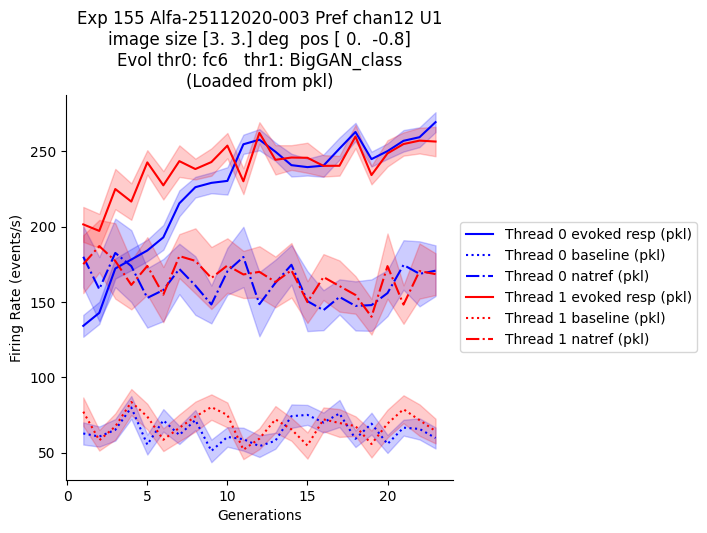

In [79]:
# Proof: Load from the saved pkl and CSVs, plot to reproduce the figure

# Load from pkl
import json
import pickle
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Expi = 155
pkl_path = join(source_data_dir, f"Figure2B_src_resp_Exp{Expi}.pkl")
with open(pkl_path, "rb") as f:
    pkl_data = pickle.load(f)

df_resp0_pkl = pkl_data["thread0_resp_df"]
df_resp1_pkl = pkl_data["thread1_resp_df"]
df_natref_resp0_pkl = pkl_data["thread0_natref_resp_df"]
df_natref_resp1_pkl = pkl_data["thread1_natref_resp_df"]

# Assuming the title_str was saved in a text file as JSON, e.g., 'title_str.json' in the same directory
meta_json_path = os.path.join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_meta.txt")
with open(meta_json_path, "r") as f:
    fig2_src_data_from_json = json.load(f)
title_str = fig2_src_data_from_json["expstr"]

# Re-plot from PKL
plt.figure(figsize=(5,5))
sns.lineplot(data=df_resp0_pkl, x="gen", y="resp", errorbar="se", label="Thread 0 evoked resp (pkl)", color="blue")
sns.lineplot(data=df_resp0_pkl, x="gen", y="bsl", errorbar="se", label="Thread 0 baseline (pkl)", color="blue", linestyle=":")
sns.lineplot(data=df_natref_resp0_pkl, x="gen", y="resp", errorbar="se", label="Thread 0 natref (pkl)", color="blue", linestyle="-.")
sns.lineplot(data=df_resp1_pkl, x="gen", y="resp", errorbar="se", label="Thread 1 evoked resp (pkl)", color="red")
sns.lineplot(data=df_resp1_pkl, x="gen", y="bsl", errorbar="se", label="Thread 1 baseline (pkl)", color="red", linestyle=":")
sns.lineplot(data=df_natref_resp1_pkl, x="gen", y="resp", errorbar="se", label="Thread 1 natref (pkl)", color="red", linestyle="-.")
plt.xlabel("Generations")
plt.ylabel("Firing Rate (events/s)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(f"{title_str}\n(Loaded from pkl)")
plt.show()


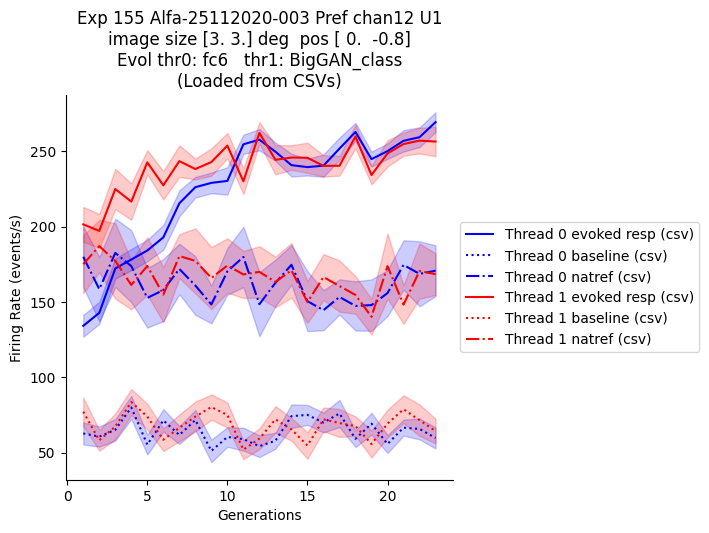

In [ ]:

# Load from CSVs
csv_names = ["DeePSim_thread_evol", "BigGAN_thread_evol", 
             "DeePSim_thread_natref", "BigGAN_thread_natref"]
csv_files = [join(source_data_dir, f"Figure2B_src_resp_Exp{Expi}_{name}.csv") for name in csv_names]
df_resp0_csv = pd.read_csv(csv_files[0])
df_resp1_csv = pd.read_csv(csv_files[1])
df_natref_resp0_csv = pd.read_csv(csv_files[2])
df_natref_resp1_csv = pd.read_csv(csv_files[3])

meta_json_path = os.path.join(source_data_dir, f"Figure2D_src_psth_Exp{Expi}_meta.txt")
with open(meta_json_path, "r") as f:
    fig2_src_data_from_json = json.load(f)
title_str = fig2_src_data_from_json["expstr"]

# Re-plot from CSVs
plt.figure(figsize=(5,5))
sns.lineplot(data=df_resp0_csv, x="gen", y="resp", errorbar="se", label="Thread 0 evoked resp (csv)", color="blue")
sns.lineplot(data=df_resp0_csv, x="gen", y="bsl", errorbar="se", label="Thread 0 baseline (csv)", color="blue", linestyle=":")
sns.lineplot(data=df_natref_resp0_csv, x="gen", y="resp", errorbar="se", label="Thread 0 natref (csv)", color="blue", linestyle="-.")
sns.lineplot(data=df_resp1_csv, x="gen", y="resp", errorbar="se", label="Thread 1 evoked resp (csv)", color="red")
sns.lineplot(data=df_resp1_csv, x="gen", y="bsl", errorbar="se", label="Thread 1 baseline (csv)", color="red", linestyle=":")
sns.lineplot(data=df_natref_resp1_csv, x="gen", y="resp", errorbar="se", label="Thread 1 natref (csv)", color="red", linestyle="-.")
plt.xlabel("Generations")
plt.ylabel("Firing Rate (events/s)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title(f"{title_str}\n(Loaded from CSVs)")
plt.show()